In [3]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense, GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np

from IPython.display import Image
from keras.optimizers import Adam

In [4]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array,axis=0)
    return preprocess_input(img_array_expanded_dims)

In [5]:
def resultGiver(file):
    preprocessed_image = prepare_image(file)
    predictions = mobile.predict(preprocessed_image)
    results = imagenet_utils.decode_predictions(predictions)
    print(results)

!pip install google_images_download

from google_images_download import google_images_download
response = google_images_download.googleimagesdownload()

arguments = {"keywords" : "cargo ship", "limit":100, "print_urls": False, "format": "jpg", "size":">400*300"}
paths = response.download(arguments)
arguments = {"keywords" : "navy battleship", "limit":100, "print_urls": False, "format":"jpg","size":">400*300"}
paths = response.download(arguments)

In [6]:
base_model = MobileNet(weights='imagenet',include_top=False)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [22]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512,activation='relu')(x)
preds = Dense(2,activation='softmax')(x)

In [23]:
model=Model(inputs=base_model.input,outputs=preds)


In [24]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)


0 input_1
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [25]:
for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True


In [26]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('Z:\codeplay\machine_mash\machine_mash\pyImagenet\\airforce',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 479 images belonging to 2 classes.


In [13]:
#print(dir(train_generator))
#print(train_generator)

In [27]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
14/14 [==============================] - 7s 470ms/step - loss: 0.8579 - accuracy: 0.7383
Epoch 2/10
14/14 [==============================] - 3s 241ms/step - loss: 0.1297 - accuracy: 0.9575
Epoch 3/10
14/14 [==============================] - 3s 241ms/step - loss: 0.0973 - accuracy: 0.9710
Epoch 4/10
14/14 [==============================] - 3s 241ms/step - loss: 0.0857 - accuracy: 0.9641
Epoch 5/10
14/14 [==============================] - 3s 241ms/step - loss: 0.0683 - accuracy: 0.9844
Epoch 6/10
14/14 [==============================] - 3s 241ms/step - loss: 0.0416 - accuracy: 0.9888
Epoch 7/10
14/14 [==============================] - 3s 241ms/step - loss: 0.0488 - accuracy: 0.9866
Epoch 8/10
14/14 [==============================] - 3s 240ms/step - loss: 0.0199 - accuracy: 0.9955
Epoch 9/10
14/14 [==============================] - 3s 242ms/step - loss: 0.0156 - accuracy: 0.9955
Epoch 10/10
14/14 [==============================] - 3s 244ms/step - loss: 0.0171 - accuracy: 0.9955

In [28]:
import matplotlib.pyplot as plt

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor
  

In [117]:
# code to store model in a pickle

In [118]:
# run uptil here
# no threat aircraft
# non threat ship
# threat aircraft
# threat ship

In [33]:
def checklabel(value):
    if(value == 1):
        print(value, ":", "strike formation suspected !!")
    elif (value == 0):
        print(value, ":", "non-strike formation...can be transport or air to air refuelling !! ")
   

Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\1 (5).jpeg



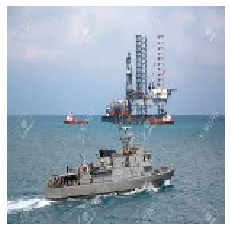



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\3 (1).jpeg



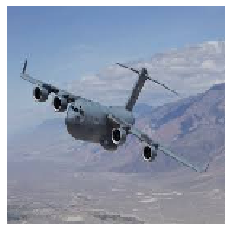



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\3 (2).jpeg



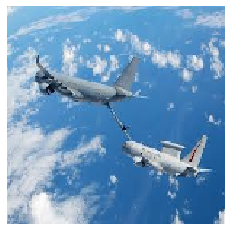



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\3 (3).jpeg



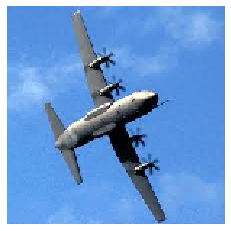



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\3 (4).jpeg



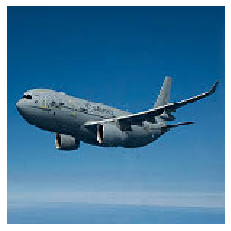



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\3 (5).jpeg



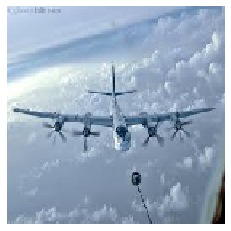



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\4 (1).jpeg



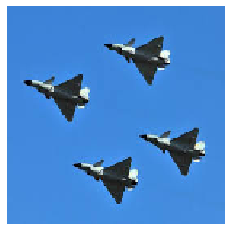



1 : strike formation suspected !!
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\4 (2).jpeg



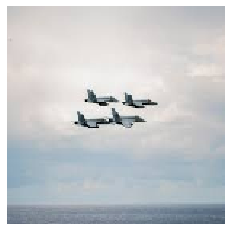



1 : strike formation suspected !!
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\4 (3).jpeg



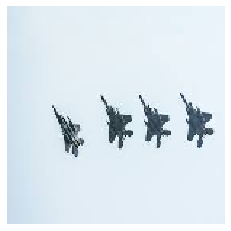



1 : strike formation suspected !!
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\4 (4).jpeg



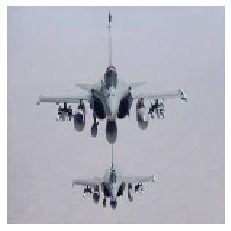



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\4 (5).jpeg



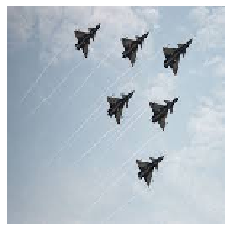



1 : strike formation suspected !!
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\airtoair (436).jpeg



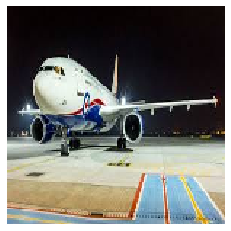



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\airtoair (80).jpeg



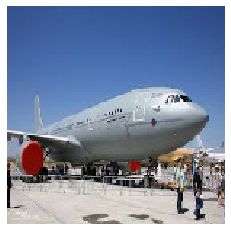



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\cargo (224).jpeg



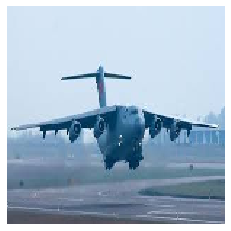



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\cargo (372).jpeg



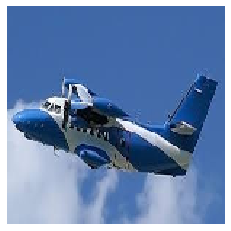



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\deftr (30).jpeg



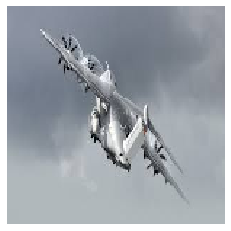



0 : non-strike formation...can be transport or air to air refuelling !! 
Z:\codeplay\machine_mash\machine_mash\pyImagenet\testing\deftr (302).jpeg



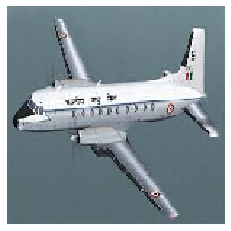



0 : non-strike formation...can be transport or air to air refuelling !! 


In [34]:
import os

rootdir = "Z:\codeplay\machine_mash\machine_mash\pyImagenet\\testing"

#print(dir(os))
#print(rootdir)

for dirName, subdirList, fileList in os.walk(rootdir):
    for fname in fileList :
        imagePath = rootdir + "\\"+ str(fname)
        print(imagePath + "\n")
        new_image = load_image(imagePath,True)
        print("\n")
        #print(dir(new_image))
        #new_image.view()
        
        pred = model.predict(new_image)
        #print(len(pred[0]))
        max = pred[0][0]
        #print("max before : ", max)
        lab = 0
        #print("lab  before : ", lab)
        for i in range(1, len(pred[0])): 
            #print(i)
            if pred[0][i] > max: 
                max = pred[0][i]
                lab = i
        #print("max after : ", max)
        #print("lab  after : ", lab)

        #print(lab, ": ", max)
        checklabel(lab)
        
        

    

In [35]:
#img_path = 'C:/Users/Ferhat/Python Code/Workshop/Tensoorflow transfer learning/blue_tit.jpg'
img_path = 'Z:\codeplay\machine_mash\machine_mash\pyImagenet\\testing\\4 (4).jpeg'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[1.0000000e+00, 2.4275822e-12]], dtype=float32)

In [36]:
print(len(pred[0]))
max = pred[0][0]
print("max before : ", max)
lab = 0
print("lab  before : ", lab)
for i in range(1, len(pred[0])): 
        print(i)
        if pred[0][i] > max: 
            max = pred[0][i]
            lab = i
print("max after : ", max)
print("lab  after : ", lab)


2
max before :  1.0
lab  before :  0
1
max after :  1.0
lab  after :  0


In [37]:
if (pred[0][1] ==  1):
    print('strike image')
else:
    print('cargo')

cargo
